# Exploratory Data Analysis
### Adult Income Dataset a.k.a ["Census Income" dataset"](https://www.kaggle.com/datasets/rdcmdev/adult-income-dataset?select=adult.data)


#### Data types
<ul>
<li><strong>income</strong>: &gt;50K, &lt;=50K.</li>
<li><strong>age</strong>: continuous.</li>
<li><strong>workclass</strong>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
<li><strong>fnlwgt</strong>: continuous. </li>
<li><strong>education</strong>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
<li><strong>education.num</strong>: continuous.</li>
<li><strong>marital-status</strong>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
<li><strong>occupation</strong>: Tech-support, Craft-Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
<li><strong>relationship</strong>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. </li>
<li><strong>sex</strong>: Female, Male. </li>
<li><strong>capital.gain</strong>: continuous. </li>
<li><strong>capital.loss</strong>: continuous. </li>
<li><strong>hours.per.week</strong>: continuous.</li>
<li><strong>native.country</strong>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&amp;Tobago, Peru, Hong, Holand-Netherlands.</li>
</ul>

#### Data description
- age: (continuous, positive integer) The age of the individual.
- workclass: (categorical, 9 distinct values) Simplified employment status of an individual
- fnlwgt: (continuous, positive integer) Final weight of the record. Basically interpret as the number of people represented by this row.
- education-num: (categorical, 13 distinct values) The education level, in ascending positive integer value.
- education: (categorical, 13 distinct values) The education level. Note that for simplicity, we will ignore this column because of the existence of education-num column.
- marital-status: (categorical, 7 distinct values) Marital status of a person.
- occupatioin: (categorical, 15 distinct values) Rough category of the occupation.
- relationship: (categorical, 6 distinct values) Relationship in terms of the family. Note that we ignore this column since the semantic is somewhat covered by marital-status and gender.
- race: (categorical, 5 distinct values) Race of the person.
- gender: (boolean) gender at-birth.
- capital-gain: (continuous) Dollar gain of capital.
- capital-loss: (continuous) Dollar loss of capital.
- hours-per-week: (continous positive integer) Working hours per week.
- native-country: (categorical, 41 distinct values) Country at birth.
- income-bracket: (boolean) True if ≥ 50K, otherwise False (< 50K per year).

### nominal_features 
 - workclass
 - marital
 - occupation
 - relationship
 - race
 - gender
 - country
 - income

### ordinal features
 - education,
 - educational num

### binary Features
 - gender   


 
### numeric Features
 - age
 - fnlwgt
 - capital gain
 - capital loss
 - hours per week

### Load data

In [1]:
from modules import plot
from modules.preprocess import drop_rows
import numpy as np
import pandas as pd
from dython import nominal

columns = [
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'educational num',
 'marital',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital gain',
 'capital loss',
 'hours per week',
 'country',
 'income'
 ]

train = pd.read_csv('data/adult.data', sep=",", names=columns)
test = pd.read_csv('data/adult.test', sep=",", names=columns)

#preprocess
train['income'] = train['income'].str.strip(' .')
test['income'] = test['income'].str.strip(' .')

data = pd.concat([train, test])

# General observations
- The dataset contains absolutely no null values!
- Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
- There are no Float Datatypes in the dataset.
- Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
- Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of '?' values in our dataset. We will have to replace or drop those values!
- The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [2]:
display(data.info(), data.describe().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational num  48842 non-null  int64 
 5   marital          48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital gain     48842 non-null  int64 
 11  capital loss     48842 non-null  int64 
 12  hours per week   48842 non-null  int64 
 13  country          48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


None

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours per week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


# Correlation of features
We calculate the correlation as follows:
- The association between nominal values computed using Cramer's V (This could be replaced with Theil's U by adding theil_u=True to the parameters of nominal.associations)
- The association between nominal and numeric values is computed using Correlation Ratio
- The association between numeric values is computed using Pearson's R (correlation)
##### We can see the following important correlations with our target feature income:
- Correlation between income and relationship
- Correlation between marital status and income
- Correlation between occupation and income
- Correlation between education and income
##### Further we can see the folowing correlations:
- Correlation between age and marrital
- Correlation between age and relationship
- Correlation between occupation and workclass
- Correlation between education and occupation
- Correlation between age and marital status
- Correlation between marital status and relationship
- Correlation between occupaation and gender
- Correlation between occupation and hours per week
- Correlation between reationship and gender
- Correlation between relationship and hours per week
- Correlation between race and country

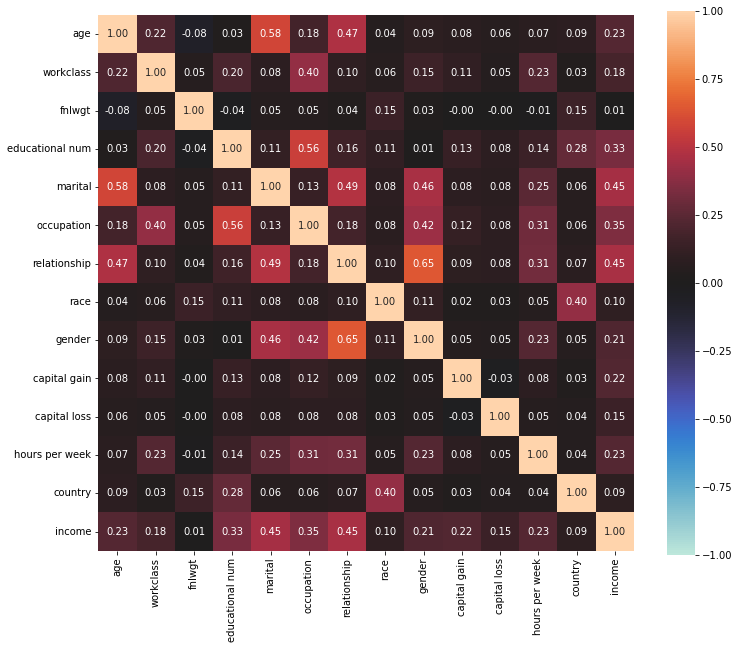

{'corr':                       age  workclass    fnlwgt  educational num   marital  \
 age              1.000000   0.215443 -0.076628         0.030940  0.578483   
 workclass        0.215443   1.000000  0.051952         0.198901  0.084506   
 fnlwgt          -0.076628   0.051952  1.000000        -0.038761  0.052459   
 educational num  0.030940   0.198901 -0.038761         1.000000  0.112939   
 marital          0.578483   0.084506  0.052459         0.112939  1.000000   
 occupation       0.178953   0.399724  0.047685         0.556812  0.130568   
 relationship     0.473784   0.099983  0.036969         0.158072  0.488059   
 race             0.042614   0.056883  0.147004         0.109372  0.082269   
 gender           0.088120   0.151246  0.027739         0.009328  0.459324   
 capital gain     0.077229   0.109188 -0.003706         0.125146  0.083843   
 capital loss     0.056944   0.045519 -0.004366         0.080972  0.076970   
 hours per week   0.071558   0.227963 -0.013519         

In [3]:
nominal.associations(data.loc[:, data.columns != 'education'], nominal_columns=['workclass', 'marital', 'occupation', 'relationship', 'race', 'gender', 'country', 'income', 'age_group'], figsize= (12,10))

# Missing values
Workclass, occupaation and country have missing values indicated with " ?".

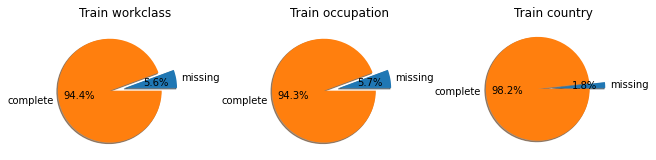

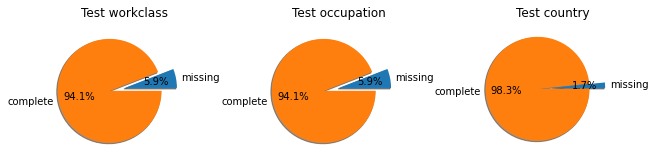

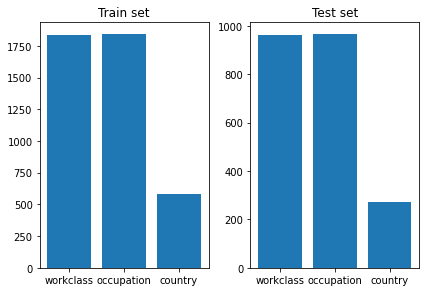

In [4]:
plot.missing_values(train, ['workclass', 'occupation', 'country'], "Train")
plot.missing_values(test, ['workclass', 'occupation', 'country'], "Test")
plot.value_occurence(train, test, value=' ?', columns=['workclass', 'occupation', 'country'])
train = drop_rows(train, ['workclass', 'occupation', 'country'], drop_val =' ?')
test = drop_rows(test, ['workclass', 'occupation', 'country'], drop_val =' ?')
data = drop_rows(data, ['workclass', 'occupation', 'country'], drop_val =' ?')
train['country'] = train['country'].str.strip(' ')
test['country'] = test['country'].str.strip(' ')
data['country'] = data['country'].str.strip(' ')

# Most of the data is from the United States
One might think about dropping other countries because almost all entries are from the United States.

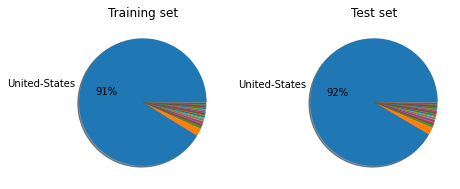

In [5]:
plot.column_pie_chart(train, test, 'country')

# Imbalance
This dataset contains a typical example of class imbalance:
- The number of people earning more than 50K dollars an year is one third of the people earning less than it.
- We should also keep in mind that this data was collected in 1996, so 50K dollars of that tme, might not be the same in today's time!

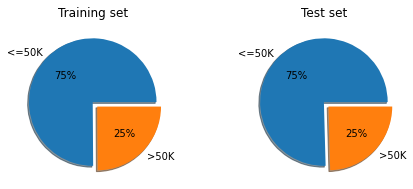

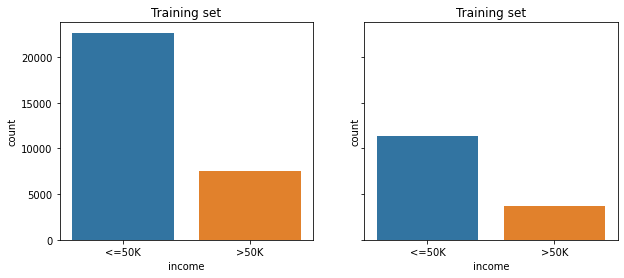

In [6]:
plot.column_pie_chart(train, test, 'income', explode=0.1)
plot.countplot(train, test, 'income')

If we look at age groups we make an interesting observation. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.

- As one might imagine, the number of people earning more than 50K is quite negligible amongst people of age group 19-30.
- For the people of age group 41-50 and 51-60, the number of people earning more than 50K is quite comparable to those earning less than it!

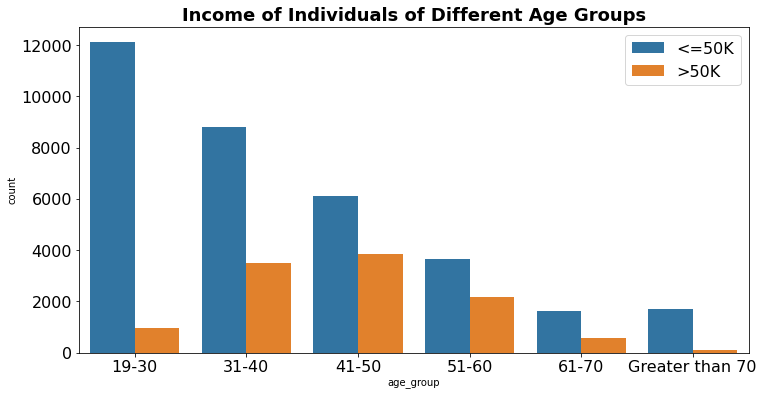

In [7]:
plot.income_by_age_group(data)

# Incomes of adults on the basis of their different working classes

- It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
- There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

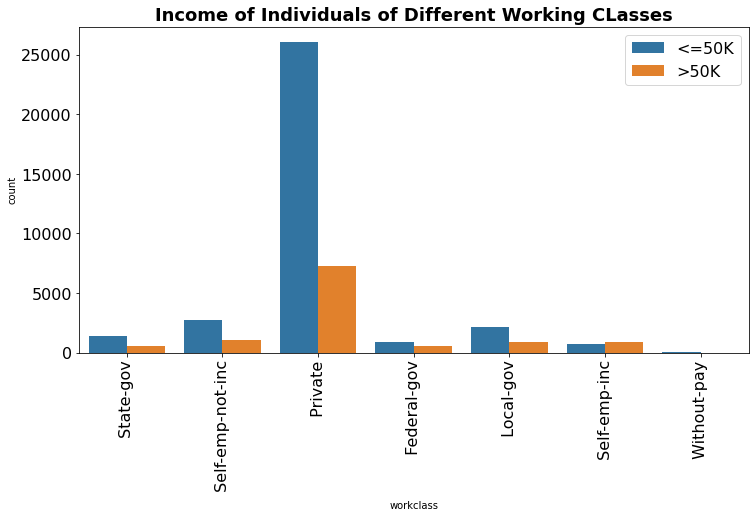

In [8]:
plot.income_by_working_class(data)

# Incomes of adults on the basis of their education level

- For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
- For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

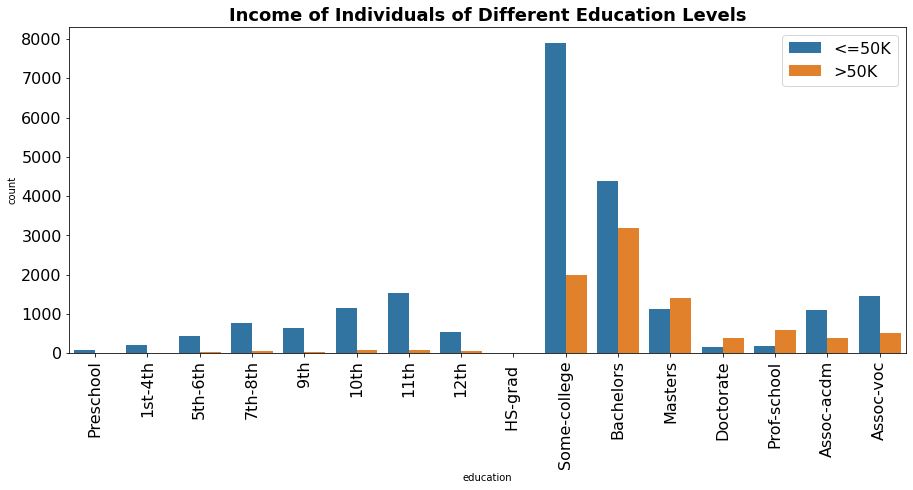

In [9]:
plot.income_by_education(data)

# Incomes of adults on the basis of their marital status
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

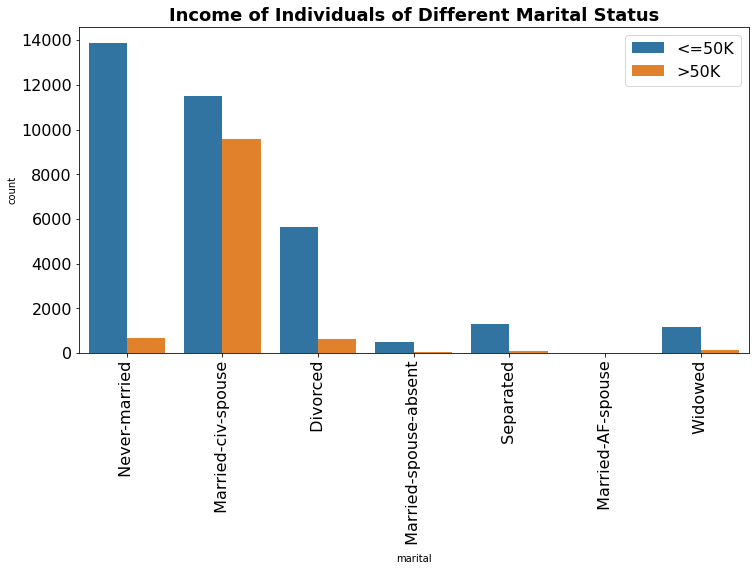

In [10]:
plot.income_by_marital_status(data)

#  Incomes of adults on the basis of their occupation
A few points to note over here:-

- Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
- There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

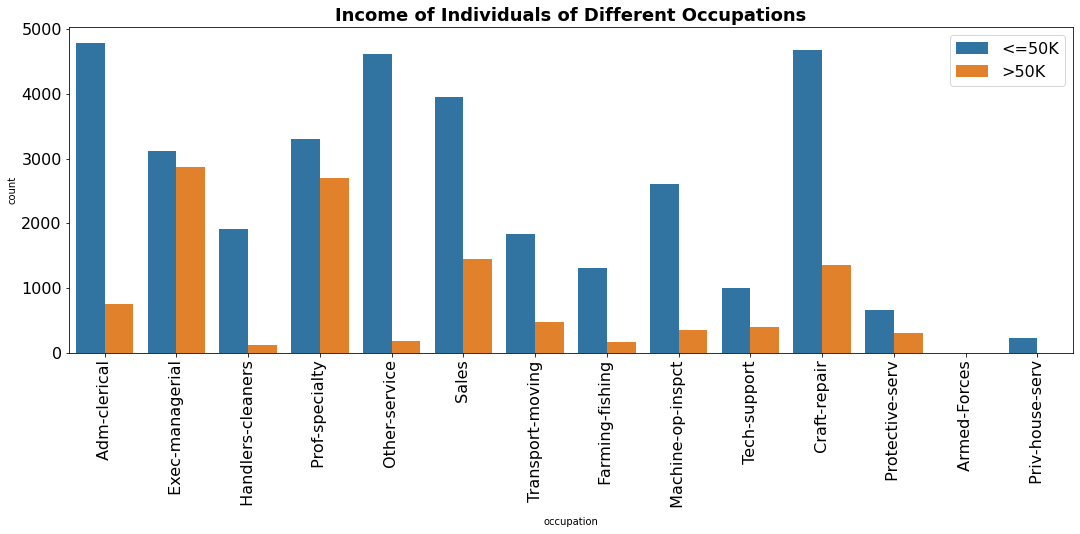

In [11]:
plot.income_by_occupation(data)

#  Incomes of adults on the basis of their relationship
- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

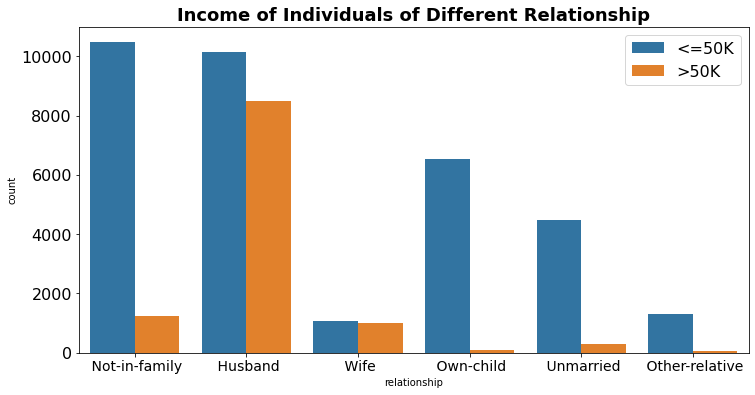

In [12]:
plot.income_by_relationship(data)

#  Incomes of adults on the basis of their race
An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

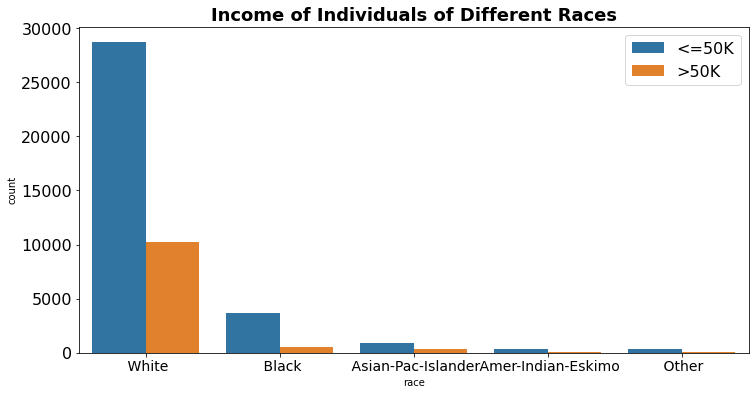

In [13]:
plot.income_by_race(data)

#  Incomes of adults on the basis of their gender
We can see a significant gap in the earnings between males and females over here.

- For Females, there are less than 10% of the adults earning more than 50K dollars an year.
- In case of Males there are close to 33% of them earning more than 50K dollars an year.

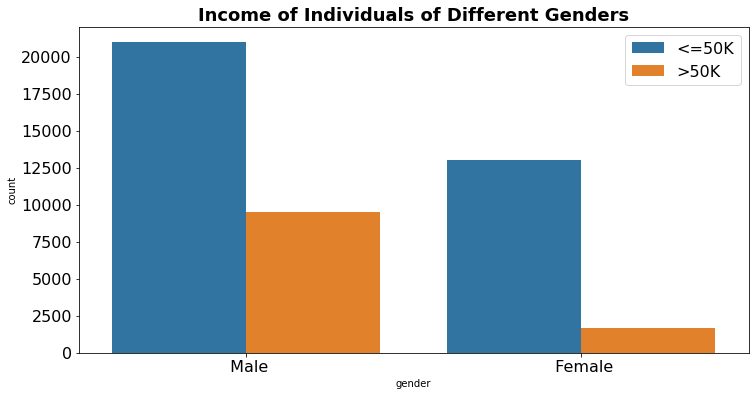

In [14]:
plot.income_by_gender(data)


# Check the distribution of the numeric features
- Entries with capital gain = 99999 => Maybe we should delete them
- Entries with in work hours per week => Maybe we should delete them

<Figure size 432x288 with 0 Axes>

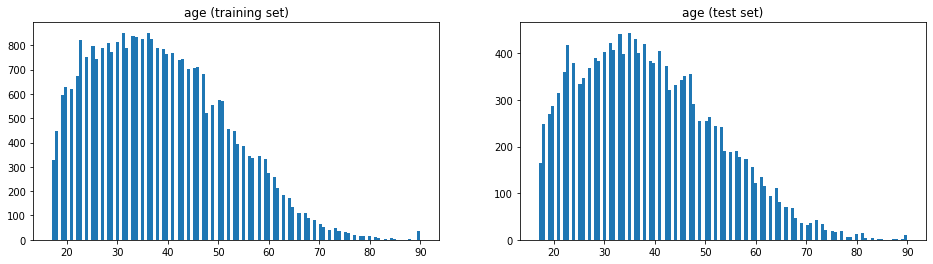

<Figure size 432x288 with 0 Axes>

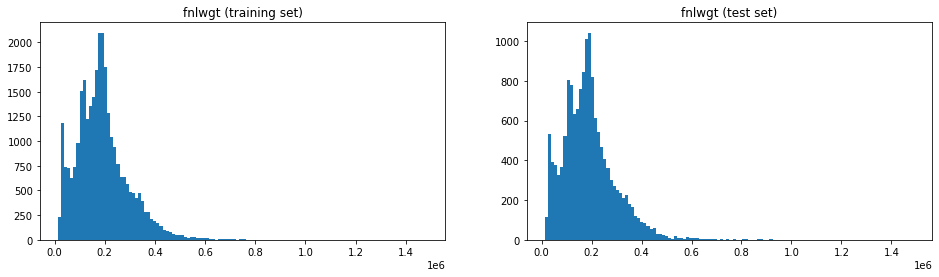

<Figure size 432x288 with 0 Axes>

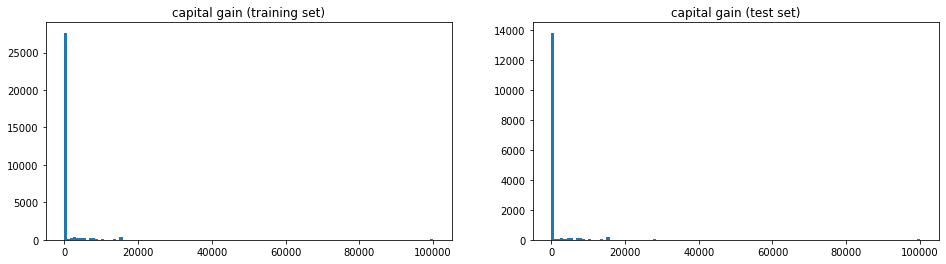

<Figure size 432x288 with 0 Axes>

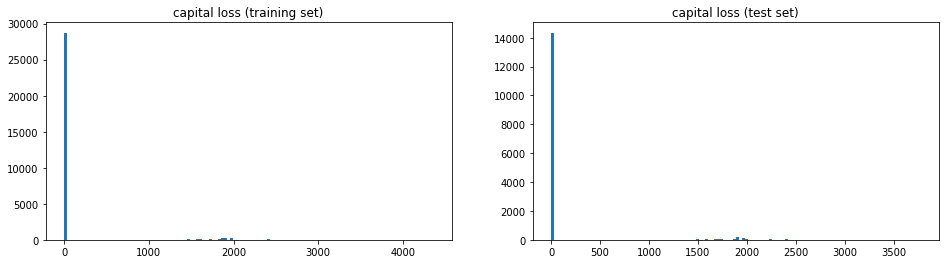

<Figure size 432x288 with 0 Axes>

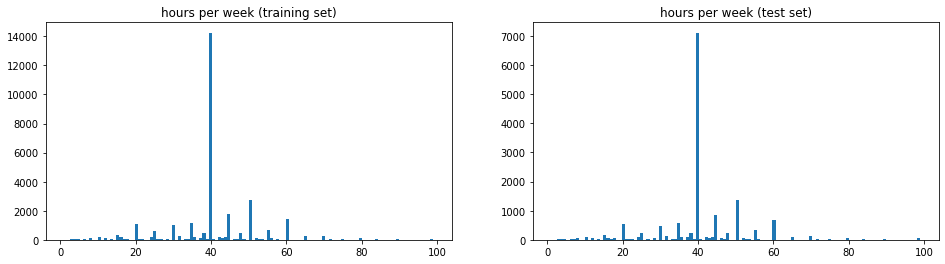

In [15]:

plot.column_hist(train, test, 'age')
plot.column_hist(train, test, 'fnlwgt')
plot.column_hist(train, test, 'capital gain')
plot.column_hist(train, test, 'capital loss')
plot.column_hist(train, test, 'hours per week')
